In [26]:
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [27]:
encoding_dim = 32
image_input = Input(shape=(784, ))

In [28]:
# encoded
encoded = Dense(encoding_dim, activation="relu")(image_input)

# decoded 
decoded = Dense(784, activation="sigmoid")(encoded)

# autoencoder
autoencoder = Model(image_input, decoded)

In [29]:
# ENCODER 
encoder = Model(image_input, encoded)

# placeholder for an encoded 32-dimensional input
encoded_input = Input(shape=(encoding_dim, ))

# retrieve last later from encoder
decoder_layer = autoencoder.layers[-1]

# DECODER
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [30]:
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [31]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [34]:
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [35]:
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 2/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 3/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6930 - val_loss: 0.6929
Epoch 4/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 5/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6928 - val_loss: 0.6928
Epoch 6/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 7/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6926 - val_loss: 0.6926
Epoch 8/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6926 - val_loss: 0.6925
Epoch 9/50
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6925 - val_

In [36]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

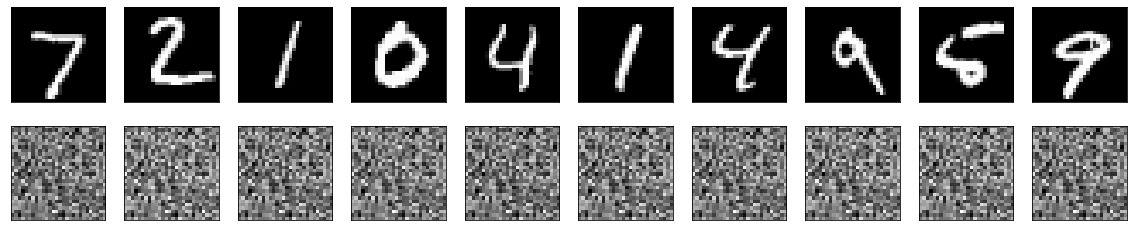

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()